This notebook walks you through the process of visualizing the plots in the paper *A Powerful Hades is an Unpopular Dude: Dynamics of Power and Agency in Hades/Persephone Fanfiction* for the Conference of Computational Literary Studies 2025.

Aside from some packages imported in the next cells, you will need the csv file titled 'CCLS2025.csv' available on the project's Github repo. The csv contains metadata for the fanfiction analyzed in the paper, as well as Riveter scores for the fanfiction. Riveter was created by Maria Antoniak et al. (2023). You can learn more about Riveter on its [Github page](https://github.com/maartensap/riveter-nlp/tree/main).

## Import Requirements

In [5]:
# importing the requirements

import numpy as np
import pandas as pd
import csv
from scipy.stats import spearmanr
from datetime import datetime
import matplotlib.pyplot as plt

## Load the data

In [6]:
df = pd.read_csv('CCLS2025.csv')

In [14]:
df['published'] = pd.to_datetime(df['published'])

This csv is a subset of the [MythFic Metadata](https://doi.org/10.34973/2mye-8468) dataset (Neugarten & Smeets 2023). The subset was created by selecting only stories about the Hades/Persephone relationship with a length below 1,000 characters.

Note that work-ids, work titles, authors' usernames and story texts have been redacted in this version of the dataset to preserve the anonymity and privacy of the fanfiction community.

In [7]:
# check whether the data has loaded correctly
df.head()

,rating,category,fandom,relationship,character,additional tags,language,published,status,status date,...,comments,kudos,bookmarks,hits,persephone_agency,hades_agency,agency_diff,hades_power,persephone_power,power_diff
0,General Audiences,['F/F'],['Greek Mythology'],['Hades/Persephone'],"['Hades', 'Persephone', 'Libera (Ancient Roman...",['Inspired by Hades and Persephone (Ancient Gr...,English,2022-12-05,Completed,2022-12-05,...,NaN,1.0,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN
1,General Audiences,['Gen'],['Ancient Greek Religion & Lore'],['Hades/Persephone (Ancient Greek Religion & L...,['Persephone (Ancient Greek Religion & Lore)'],['Drabble'],English,2022-11-14,Completed,2022-11-14,...,4.0,23.0,NaN,184,-0.285714,NaN,NaN,NaN,0.000000,NaN
2,General Audiences,['F/M'],['Ancient Greek Religion & Lore'],['Hades/Persephone (Ancient Greek Religion & L...,['Persephone (Ancient Greek Religion & Lore)'],['Drabble'],English,2022-11-06,Completed,2022-11-06,...,4.0,11.0,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN
3,General Audiences,['F/F'],"['Ancient Greek Religion & Lore', 'Original Wo...",['Hera/Persephone (Ancient Greek Religion & Lo...,"['Persephone (Ancient Greek Religion & Lore)',...","['Declarations Of Love', 'Longing', 'Pining', ...",English,2022-10-31,Completed,2022-10-31,...,NaN,13.0,2.0,119,NaN,NaN,NaN,NaN,NaN,NaN
4,General Audiences,['Gen'],['Ancient Greek Religion & Lore'],['Demeter & Persephone (Ancient Greek Religion...,"['Demeter (Ancient Greek Religion & Lore)', 'P...","['Trick or Treat: Trick', 'Mother-Daughter Rel...",English,2022-10-28,Completed,2022-10-28,...,3.0,16.0,2.0,80,0.357143,0.0,-0.357143,0.2,-0.142857,0.342857


## Get some descriptive statistics of the data

In [8]:
wordcount = df['words'].sum()
print(f"Total wordcount: {wordcount}")

Total wordcount: 369809


In [9]:
# I applied the describe method to persephone_power, persephone_agency, hades_power, hades_agency, 
# power_diff and agency-diff to get the descriptive statistics reported in Table 1 of the paper.

df['persephone_power'].describe()

count    145.000000
mean      -0.092798
std        0.276003
min       -1.000000
25%       -0.250000
50%       -0.083333
75%        0.031250
max        1.000000
Name: persephone_power, dtype: float64

## Scatter and Line Plots of Power Differences over Time

The code used to create these plots was adapted from [Yang & Pianzola (2024)](https://github.com/GOLEM-lab/Omegaverse_Study).

In [6]:
df['published'] = pd.to_datetime(df['published'])

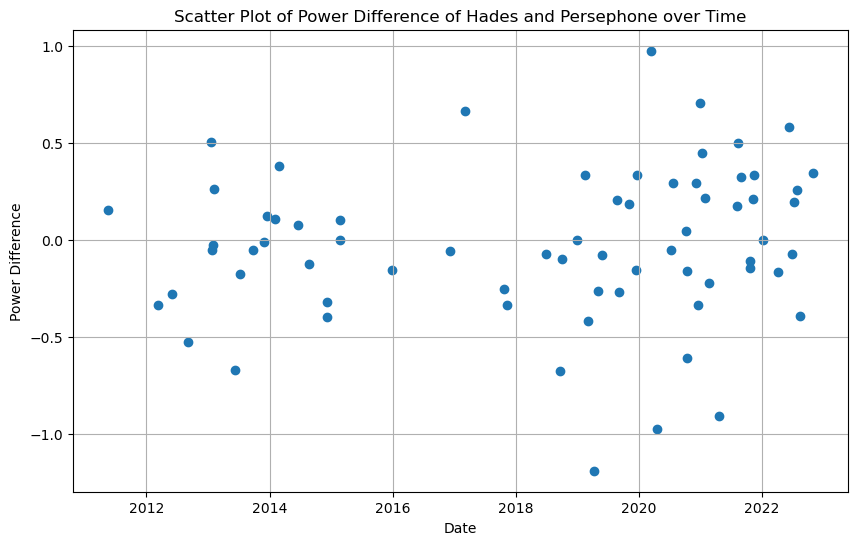

<Figure size 640x480 with 0 Axes>

In [7]:
# This became Figure 1 in the paper

df['year'] = df['published'].dt.year
yearly_mean = df.groupby('year')['power_diff'].mean().reset_index()

##scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['published'], df['power_diff'])
plt.xlabel('Date')
plt.ylabel('Power Difference')
plt.title('Scatter Plot of Power Difference of Hades and Persephone over Time')
plt.grid(True)
plt.show()
plt.savefig("scatter_power.png", dpi=300)

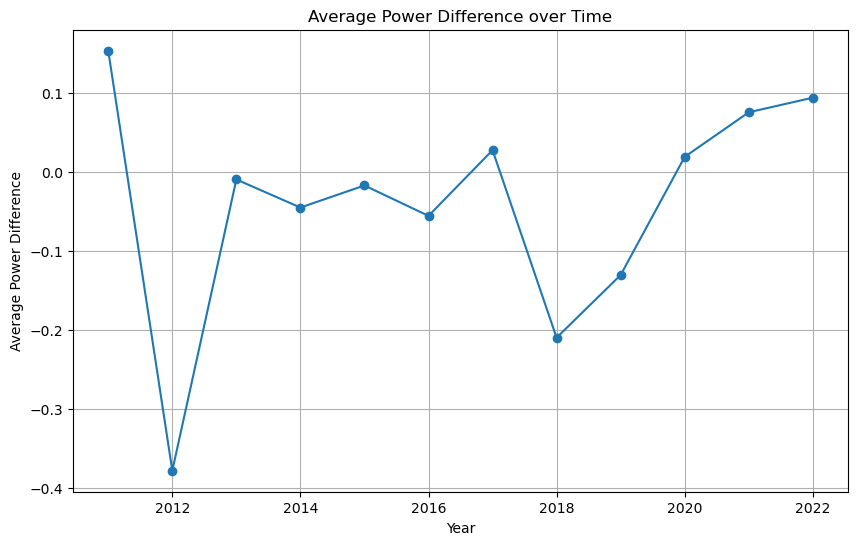

In [8]:
# This became Figure 2 in the paper

plt.figure(figsize=(10, 6))
plt.plot(yearly_mean['year'], yearly_mean['power_diff'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Power Difference')
plt.title('Average Power Difference over Time')
plt.grid(True)
plt.show()

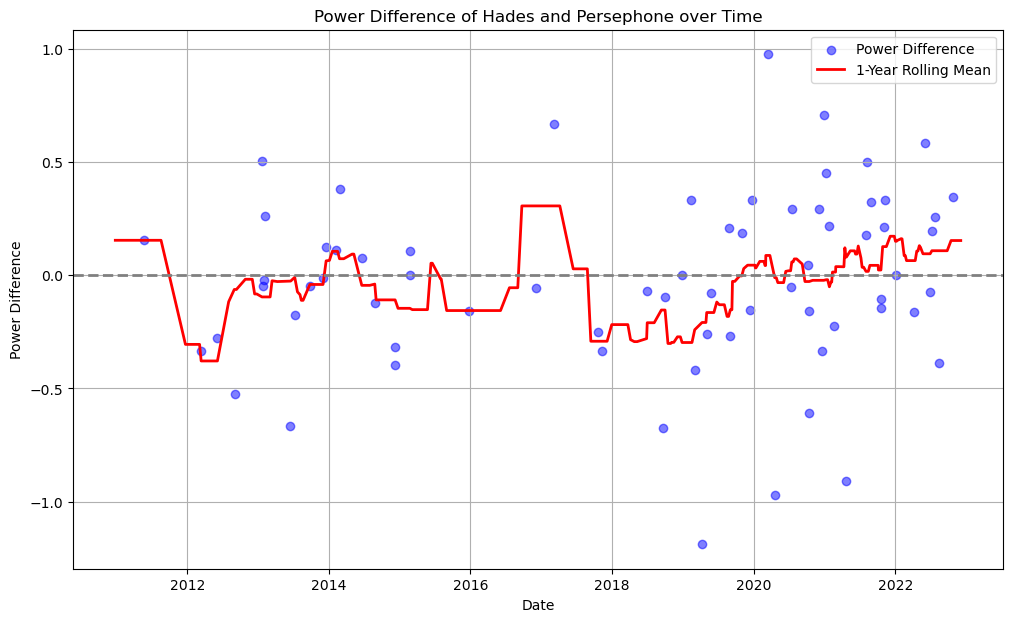

<Figure size 640x480 with 0 Axes>

In [15]:
df_sorted = df.sort_values('published')
df_sorted = df_sorted.set_index('published')  # set published as the index

# Time-based rolling mean (e.g., 91-year window)
df_sorted['rolling_mean'] = df_sorted['power_diff'].rolling('365D', center=True).mean()

# Reset index for plotting
df_sorted = df_sorted.reset_index()

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(df_sorted['published'], df_sorted['power_diff'], color='blue', alpha=0.5, label='Power Difference')
plt.plot(df_sorted['published'], df_sorted['rolling_mean'], color='red', linewidth=2, label='1-Year Rolling Mean')
plt.axhline(0, color='grey', linewidth=2, linestyle='--')

plt.xlabel('Date')
plt.ylabel('Power Difference')
plt.title('Power Difference of Hades and Persephone over Time')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('power_difference_combined.png', dpi=300, bbox_inches='tight')

## Scatter and Line Plots of Agency Differences over Time

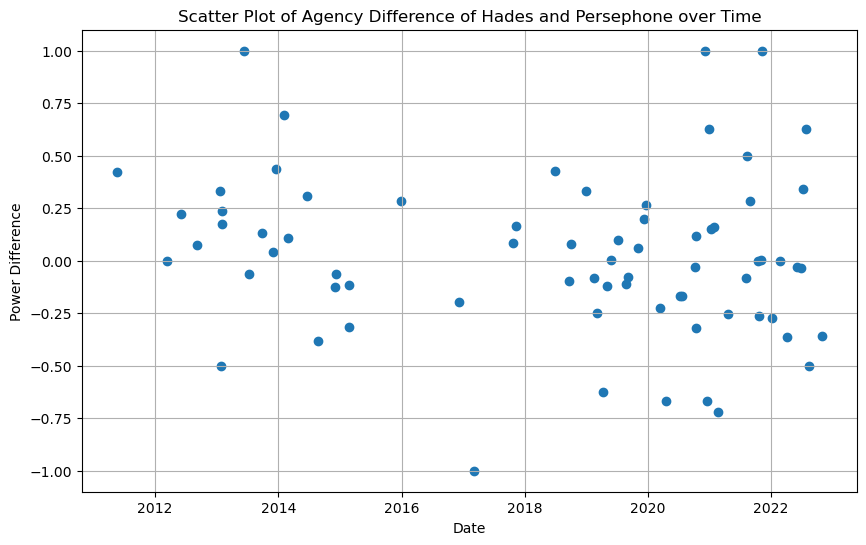

In [9]:
# This became Figure 3 in the paper

df['year'] = df['published'].dt.year
yearly_mean = df.groupby('year')['agency_diff'].mean().reset_index()

##scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['published'], df['agency_diff'])
plt.xlabel('Date')
plt.ylabel('Power Difference')
plt.title('Scatter Plot of Agency Difference of Hades and Persephone over Time')
plt.grid(True)
plt.show()

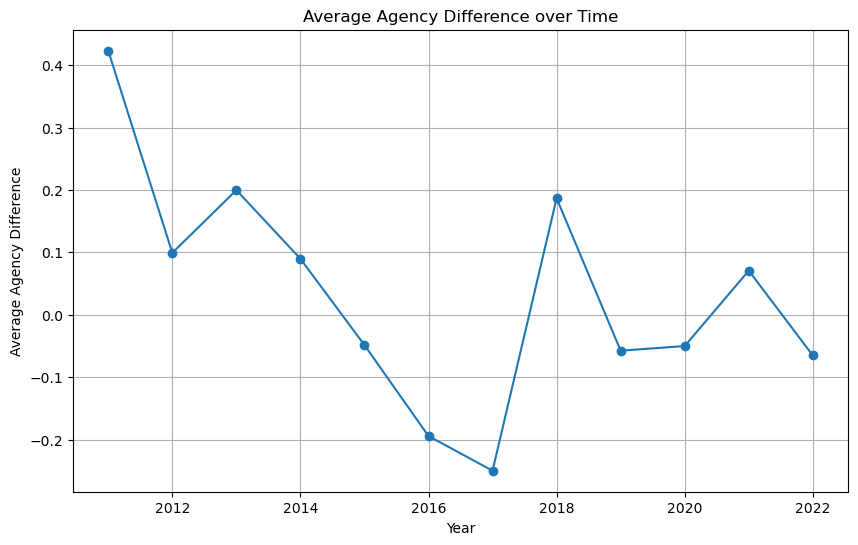

In [10]:
# This became Figure 4 in the paper

plt.figure(figsize=(10, 6))
plt.plot(yearly_mean['year'], yearly_mean['agency_diff'], marker='o')
plt.xlabel('Year')
plt.ylabel('Average Agency Difference')
plt.title('Average Agency Difference over Time')
plt.grid(True)
plt.show()

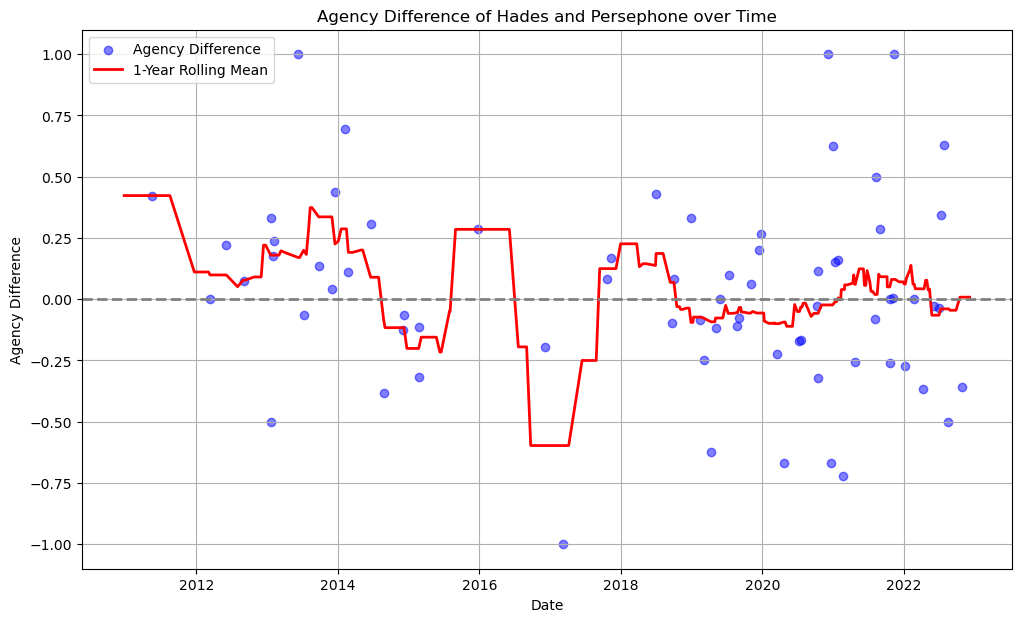

In [13]:
df_sorted = df.sort_values('published')
df_sorted = df_sorted.set_index('published')  # set published as the index

# Time-based rolling mean (e.g., 91-year window)
df_sorted['rolling_mean'] = df_sorted['agency_diff'].rolling('365D', center=True).mean()

# Reset index for plotting
df_sorted = df_sorted.reset_index()

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(df_sorted['published'], df_sorted['agency_diff'], color='blue', alpha=0.5, label='Agency Difference')
plt.plot(df_sorted['published'], df_sorted['rolling_mean'], color='red', linewidth=2, label='1-Year Rolling Mean')
plt.axhline(0, color='grey', linewidth=2, linestyle='--')

plt.xlabel('Date')
plt.ylabel('Agency Difference')
plt.title('Agency Difference of Hades and Persephone over Time')
plt.grid(True)
plt.legend()
plt.show()

## Comparison with Omegaverse Study

The code used to create these plots was adapted from [Yang & Pianzola (2024)](https://github.com/GOLEM-lab/Omegaverse_Study).

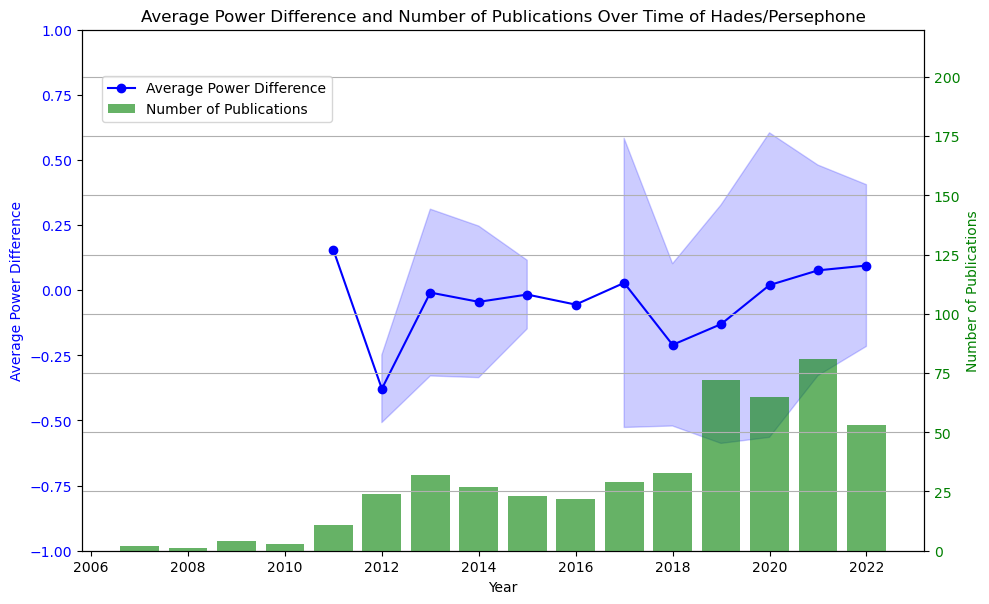

In [11]:
# This became Figure 6 in the paper

yearly_stats = df.groupby('year')['power_diff'].agg(['mean', 'std']).reset_index()
yearly_stats.columns = ['year', 'mean_power_diff', 'std_power_diff']


yearly_counts = df['year'].value_counts().sort_index().reset_index()
yearly_counts.columns = ['year', 'count']
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(yearly_stats['year'], yearly_stats['mean_power_diff'], color='b', marker='o', label='Average Power Difference')
ax1.fill_between(yearly_stats['year'], 
                 yearly_stats['mean_power_diff'] - yearly_stats['std_power_diff'], 
                 yearly_stats['mean_power_diff'] + yearly_stats['std_power_diff'], 
                 color='b', alpha=0.2)

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Power Difference', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(-1.0, 1.0)

ax2 = ax1.twinx()
ax2.bar(yearly_counts['year'], yearly_counts['count'], color='g', alpha=0.6, label='Number of Publications')
ax2.set_ylabel('Number of Publications', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylim(0, 220)


fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.grid(True)
plt.title('Average Power Difference and Number of Publications Over Time of Hades/Persephone')
plt.show()

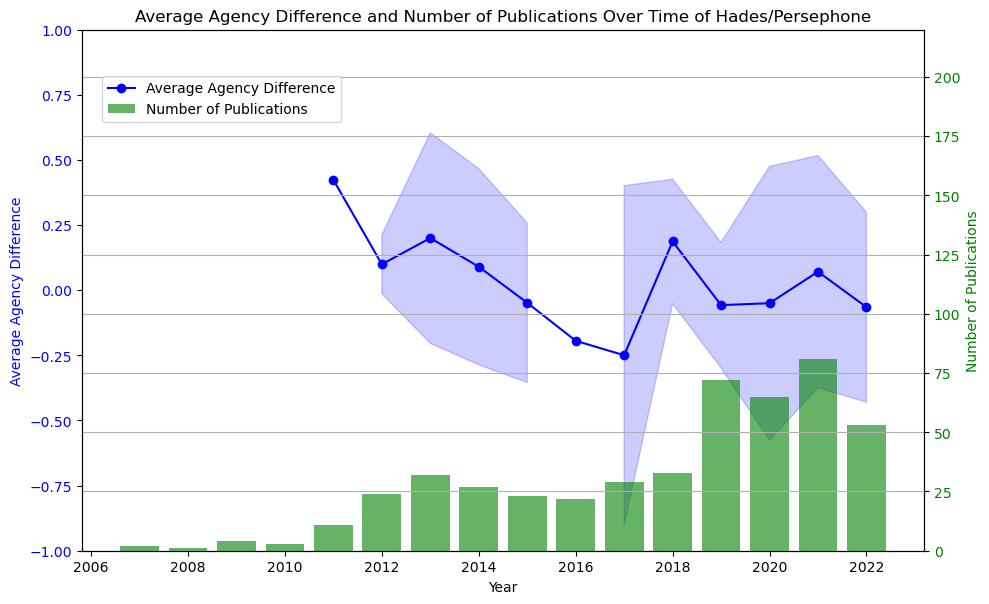

In [12]:
# This became Figure 7 in the paper

yearly_stats = df.groupby('year')['agency_diff'].agg(['mean', 'std']).reset_index()
yearly_stats.columns = ['year', 'mean_agency_diff', 'std_agency_diff']


yearly_counts = df['year'].value_counts().sort_index().reset_index()
yearly_counts.columns = ['year', 'count']
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(yearly_stats['year'], yearly_stats['mean_agency_diff'], color='b', marker='o', label='Average Agency Difference')
ax1.fill_between(yearly_stats['year'], 
                 yearly_stats['mean_agency_diff'] - yearly_stats['std_agency_diff'], 
                 yearly_stats['mean_agency_diff'] + yearly_stats['std_agency_diff'], 
                 color='b', alpha=0.2)

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Agency Difference', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(-1.0, 1.0)

ax2 = ax1.twinx()
ax2.bar(yearly_counts['year'], yearly_counts['count'], color='g', alpha=0.6, label='Number of Publications')
ax2.set_ylabel('Number of Publications', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylim(0, 220)


fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.grid(True)
plt.title('Average Agency Difference and Number of Publications Over Time of Hades/Persephone')
plt.show()